In [1]:
import json
from collections import defaultdict

import pandas as pd
import numpy as np
import seaborn as sns

# Bitly Data

In [2]:
with open('pydata-book/datasets/bitly_usagov/example.txt') as f:
    data = [json.loads(l) for l in f]

In [3]:
len(data)

3560

In [4]:
data[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [5]:
set(rec['tz'] for rec in data if 'tz' in rec and rec['tz'])

{'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Johannesburg',
 'Africa/Lusaka',
 'America/Anchorage',
 'America/Argentina/Buenos_Aires',
 'America/Argentina/Cordoba',
 'America/Argentina/Mendoza',
 'America/Bogota',
 'America/Caracas',
 'America/Chicago',
 'America/Chihuahua',
 'America/Costa_Rica',
 'America/Denver',
 'America/Edmonton',
 'America/Guayaquil',
 'America/Halifax',
 'America/Indianapolis',
 'America/La_Paz',
 'America/Lima',
 'America/Los_Angeles',
 'America/Managua',
 'America/Mazatlan',
 'America/Mexico_City',
 'America/Monterrey',
 'America/Montevideo',
 'America/Montreal',
 'America/New_York',
 'America/Phoenix',
 'America/Puerto_Rico',
 'America/Rainy_River',
 'America/Recife',
 'America/Santo_Domingo',
 'America/Sao_Paulo',
 'America/St_Kitts',
 'America/Tegucigalpa',
 'America/Vancouver',
 'America/Winnipeg',
 'Asia/Amman',
 'Asia/Bangkok',
 'Asia/Beirut',
 'Asia/Calcutta',
 'Asia/Dubai',
 'Asia/Harbin',
 'Asia/Hong_Kong',
 'Asia/Istanbul',
 'Asi

### Pure Python

In [6]:
counts = defaultdict(int)
for rec in data:
    tz = rec.get('tz', None)
    if tz is not None:
        counts[tz] += 1
counts

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

### pandas

In [7]:
fr = pd.DataFrame(data)
fr

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [8]:
fr.groupby('tz').count()

,a,c,nk,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
tz,,,,,,,,,,,,,,,,,
,521,0,521,0,521,521,521,507,521,521,521,521,521,0,0,0,11
Africa/Cairo,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0
Africa/Casablanca,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
Africa/Ceuta,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0
Africa/Johannesburg,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Europe/Volgograd,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
Europe/Warsaw,16,16,16,16,16,16,16,15,16,16,16,16,16,16,16,0,0
Europe/Zurich,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0


In [9]:
fr['tz'].value_counts()[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [10]:
clean_tz = fr['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

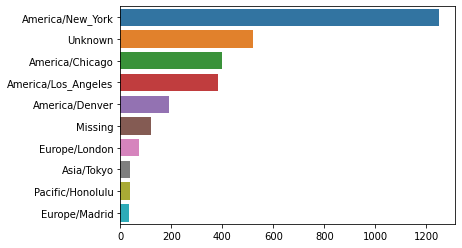

In [11]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [12]:
fr.a[1]

'GoogleMaps/RochesterNY'

In [13]:
fr.a[50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [14]:
agent_first_terms = pd.Series(x.split()[0] for x in fr.a.dropna())
agent_counts = agent_first_terms.value_counts()[:10]
agent_counts

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [15]:
cframe = fr[fr.a.notnull()].copy()
cframe['os'] = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [16]:
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [17]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [18]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Very similarly, we can use the pandas `nlargest` method.

In [19]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [20]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [21]:
count_subset = count_subset.reset_index()
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

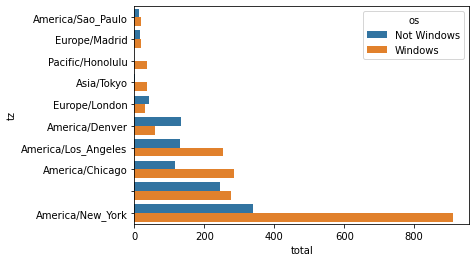

In [22]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

# MovieLens 1M Dataset

Note - this is an older "stable" dataset that [GroupLens Research](https://grouplens.org/datasets/movielens/) no longer recommends for education or for research.

In [23]:
# make display smaller
pd.options.display.max_rows = 10

In [24]:
%ls pydata-book/datasets/movielens

README       movies.dat   ratings.dat  users.dat


In [25]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('pydata-book/datasets/movielens/users.dat', sep='::', header=None, engine='python', names=unames)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [26]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('pydata-book/datasets/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [27]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('pydata-book/datasets/movielens/movies.dat', header=0, sep='::', engine='python', names=mnames)
movies

,movie_id,title,genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


Pandas infers the join columns below - ratings and users have a common column of user_id, and then movies and the combined data have a common column of movie id.

In [28]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
998127,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
998128,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
998129,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
998130,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


I'm not that fast, but look at how little syntax is required to do the pivot and how fast it is.
It would be better to put the movie_id in the index, and then leave the title in the table, but he wants to demonstrate capability here.

In [29]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


Note that we may not have that many ratings for some movies, we better look and see.

In [30]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3705, dtype: int64

If we are doing a recommendation algorithm, we may want to exclude movies that don't have enough ratings.  This could be done by merging this count into the `movies` frame before the merge.

In [31]:
active_titles = ratings_by_title.index[ratings_by_title > 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1213)

In [32]:
active_mean_ratings= mean_ratings.loc[active_titles]
active_mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [33]:
top_female_ratings = active_mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


Interesting idea to figure out the movies that Men and Women most disagree on.

In [34]:
active_mean_ratings['diff'] = active_mean_ratings['M'] - active_mean_ratings['F']
active_mean_ratings['absdiff'] = active_mean_ratings['diff'].abs()
active_mean_ratings

gender,F,M,diff,absdiff
title,,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586,0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444,0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785,0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024,0.144024
...,...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758,0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362,0.151362


The top-ten movies where Men and Women diagreed:

In [35]:
active_mean_ratings.sort_values(by='absdiff', ascending=False)[:10]

gender,F,M,diff,absdiff
title,,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985,0.611985
Grease (1978),3.975265,3.367041,-0.608224,0.608224


Movies where the ratings were least consistent. Let's compute the standard deviation of the ratings by title, and then filter down to only chose active titles we identified before.

In [36]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
                                       ...   
Young Guns (1988)                    1.017437
Young Guns II (1990)                 1.071959
Young Sherlock Holmes (1985)         0.891176
Zero Effect (1998)                   1.042932
eXistenZ (1999)                      1.178568
Name: rating, Length: 1213, dtype: float64

Now, let's look at the movies with the largest standard deviation.

In [38]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# US Baby Names 1880-2010

Loading this apparently requires some data wrangling, let's see.

In [39]:
%ls pydata-book/datasets/babynames/

NationalReadMe.pdf  yob1912.txt         yob1945.txt         yob1978.txt
yob1880.txt         yob1913.txt         yob1946.txt         yob1979.txt
yob1881.txt         yob1914.txt         yob1947.txt         yob1980.txt
yob1882.txt         yob1915.txt         yob1948.txt         yob1981.txt
yob1883.txt         yob1916.txt         yob1949.txt         yob1982.txt
yob1884.txt         yob1917.txt         yob1950.txt         yob1983.txt
yob1885.txt         yob1918.txt         yob1951.txt         yob1984.txt
yob1886.txt         yob1919.txt         yob1952.txt         yob1985.txt
yob1887.txt         yob1920.txt         yob1953.txt         yob1986.txt
yob1888.txt         yob1921.txt         yob1954.txt         yob1987.txt
yob1889.txt         yob1922.txt         yob1955.txt         yob1988.txt
yob1890.txt         yob1923.txt         yob1956.txt         yob1989.txt
yob1891.txt         yob1924.txt         yob1957.txt         yob1990.txt
yob1892.txt         yob1925.txt         yob1958.txt         yob1

In [40]:
!head -10 pydata-book/datasets/babynames/yob1880.txt

In [41]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'pydata-book/datasets/babynames/yob{:d}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

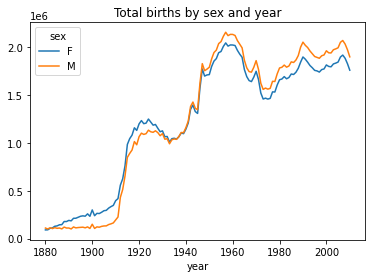

In [42]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot(title='Total births by sex and year')

Add proportion column to add proportion of births relative to year and sex.

In [43]:
def apply_proportion(group):
    group['proportion'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(apply_proportion)
names

,name,sex,births,year,proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


Sanity check that proportion always sums to 1.

In [44]:
names.groupby(['year', 'sex']).proportion.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: proportion, Length: 262, dtype: float64

Reduce numbers of samples by taking the top 1000 names for each group.

In [45]:
def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000

name sex  births  year  proportion
year sex                                                 
1880 F   0             Mary   F    7065  1880    0.077643
         1             Anna   F    2604  1880    0.028618
         2             Emma   F    2003  1880    0.022013
         3        Elizabeth   F    1939  1880    0.021309
         4           Minnie   F    1746  1880    0.019188
...                     ...  ..     ...   ...         ...
2010 M   1677639     Camilo   M     194  2010    0.000102
         1677640     Destin   M     194  2010    0.000102
         1677641     Jaquan   M     194  2010    0.000102
         1677642     Jaydan   M     194  2010    0.000102
         1677645     Maxton   M     193  2010    0.000102

[261877 rows x 5 columns]

In [46]:
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [47]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [48]:
total_births = top1000.pivot_table('births', index='year', aggfunc='sum', columns='name')
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

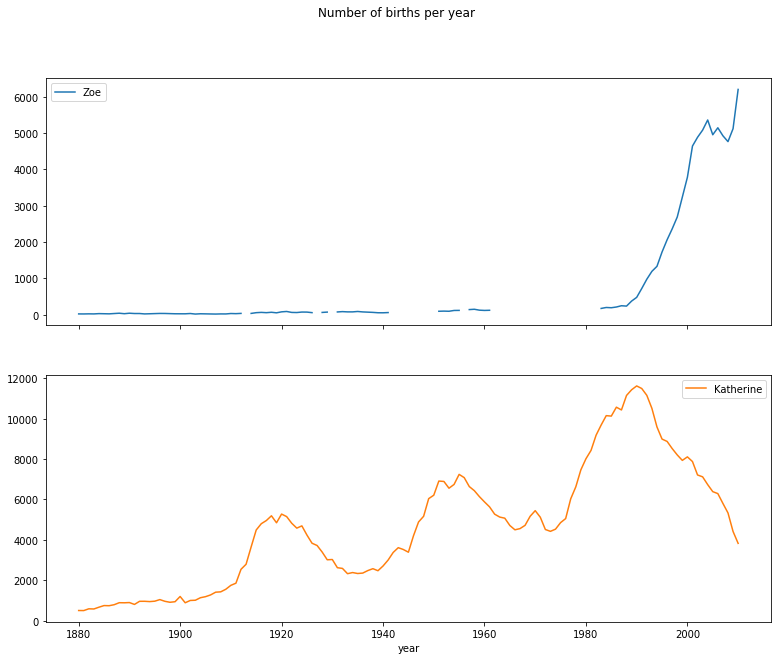

In [49]:
subset = total_births[['Zoe', 'Katherine']]
subset.plot(subplots=True, figsize=(13, 10), grid=False, title='Number of births per year')

Below you see what happens when I read the text and try to reproduce the calculation.  I use `groupby` and `sum` to come up with the same numbers.  But when I go back to the book I see the great utility of `pivot_table` and preserving a `DataFrame` and plotability.

In [50]:
top1000.groupby(['year', 'sex'])['proportion'].sum()

year  sex
1880  F      1.000000
      M      0.997375
1881  F      1.000000
      M      1.000000
1882  F      0.998702
               ...   
2008  M      0.850003
2009  F      0.737290
      M      0.845256
2010  F      0.736780
      M      0.843156
Name: proportion, Length: 262, dtype: float64

In [51]:
pivdata = top1000.pivot_table('proportion', index='year', columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Probability of a name in the top 1000 by year and sex'}, xlabel='year'>

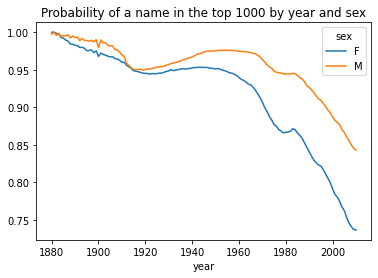

In [52]:
pivdata.plot(title='Probability of a name in the top 1000 by year and sex')

<AxesSubplot:title={'center':'Probability of a name in the top 1000 by year and sex'}, xlabel='year'>

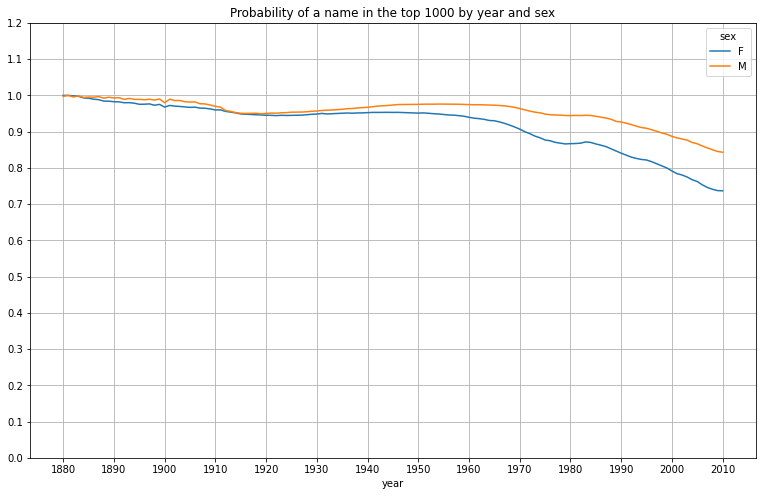

In [53]:
pivdata.plot(title='Probability of a name in the top 1000 by year and sex',
             figsize=(13, 8),
             grid=True,
             xticks=range(1880, 2020, 10),
             yticks=np.linspace(0, 1.2, 13))

In [54]:
boys[boys.year == 2010]

,name,sex,births,year,proportion
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [55]:
boys2010 = boys[boys.year == 2010]
boys2010_prop_cumsum = boys2010.sort_values(by='proportion', ascending=False).proportion.cumsum()
boys2010_prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: proportion, Length: 1000, dtype: float64

In [56]:
boys2010_prop_cumsum.searchsorted(0.5)

116

We can generalize this and get the before you reach the 50% quantile by year, and sex (e.g. apply it to a group)

In [57]:
def quantile_count(group, q=0.5):
    group = group.sort_values(by='proportion', ascending=False)
    return group.proportion.cumsum().searchsorted(q) + 1

quantile_count(boys2010)

117

In [58]:
diversity = top1000.groupby(['year', 'sex']).apply(quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

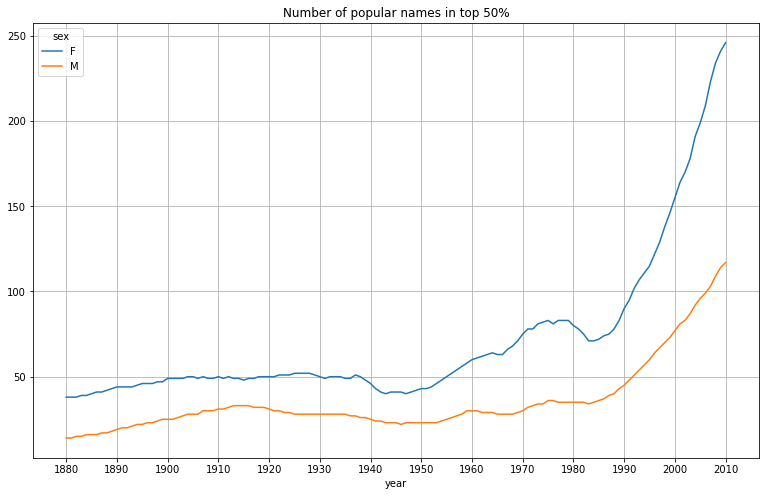

In [59]:
diversity.plot(title='Number of popular names in top 50%',
               grid=True,
               figsize=(13, 8),
               xticks=range(1880, 2020, 10))

Revolution in last letter of baby names.

In [60]:
get_last_letter = lambda name: name[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last letter'

names_by_last_letter = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
names_by_last_letter

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]

In [61]:
subtable = names_by_last_letter.reindex(columns=[1910, 1960, 2010], level='year')
subtable.fillna(0, inplace=True)
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 0.0     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
...               ...       ...       ...      ...       ...       ...
v                 0.0     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

[26 rows x 6 columns]

In [62]:
last_letter_proportion = subtable / subtable.sum()
last_letter_proportion

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b            0.000000  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v            0.000000  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

In [63]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Women'}, xlabel='last letter'>

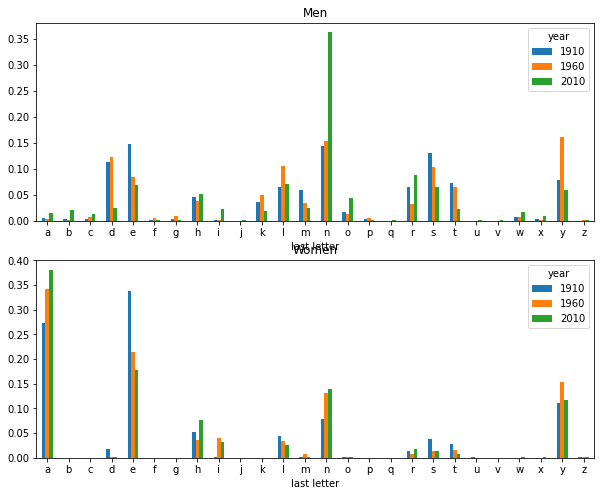

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
last_letter_proportion['M'].plot(kind='bar', rot=0, ax=axes[0], title='Men')
last_letter_proportion['F'].plot(kind='bar', rot=0, ax=axes[1], title='Women')

He points out that male names ending in "N" have had a great deal of growth. He then goes on to look at the names like "Leslie" and how it has become more gendered female than male since 1880.

# USDA Food Database

This is a nutrition database I should get on my phone in some format.

In [65]:
import json

In [66]:
%ls pydata-book/datasets/usda_food/

database.json


In [67]:
with open('pydata-book/datasets/usda_food/database.json') as f:
    usda_food = json.load(f)

In [68]:
len(usda_food)

6636

In [69]:
usda_food[0]

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [70]:
nutrients = pd.DataFrame(usda_food[0]['nutrients'])
nutrients

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [71]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(usda_food, columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [72]:
info[info.description.str.contains('Cheese')]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
5078,"Cheese, pasteurized process, cheddar or americ...",Dairy and Egg Products,43398,None
5081,"Cheese, swiss, low sodium",Dairy and Egg Products,43405,None
5113,"Cheese, swiss, low fat",Dairy and Egg Products,43589,None
5115,"Cheese, mozzarella, low sodium",Dairy and Egg Products,43597,None


In [73]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
                                    ... 
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Name: group, Length: 25, dtype: int64

Let's compute some summary statistics

In [74]:
nutrients = []
for food in usda_food:
    fnuts = pd.DataFrame(food['nutrients'])
    fnuts['id'] = food['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [75]:
nutrients.duplicated().sum()

14179

In [76]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Before joining/merging the food `info` DataFrame and the food `nutrients` DataFrame, we'll want to rename the duplicate columns "group" and "description".

In [77]:
info_mapping = {'description': 'food', 'group': 'fgroup'}
info = info.rename(columns=info_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [78]:
nutrient_mapping = {'description': 'nutrient', 'group': 'nutgroup'}
nutrients = nutrients.rename(columns=nutrient_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [79]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


We can now make a plot of median foods by food group and nutrient type.

In [80]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

<AxesSubplot:ylabel='fgroup'>

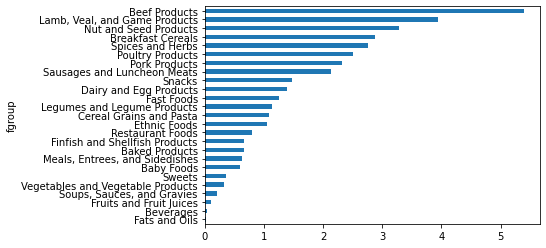

In [81]:
result.loc['Zinc, Zn'].sort_values().plot(kind='barh')

We can see right away that Beef has the most Zinc.  It appears that this is the best data source for basing a nutrition database on, and the up-to-date version (not JSON) is https://fdc.nal.usda.gov/.

# 2012 Election Commission Database

We are looking at the contributor database which is disclosed.

In [83]:
%ls pydata-book/datasets/fec/

P00000001-ALL.csv


In [86]:
!head pydata-book/datasets/fec/P00000001-ALL.csv

cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
C00410118,"P20002978","Bachmann, Michelle","HARVEY, WILLIAM","MOBILE","AL","366010290","RETIRED","RETIRED",250,20-JUN-11,"","","","SA17A",736166
C00410118,"P20002978","Bachmann, Michelle","HARVEY, WILLIAM","MOBILE","AL","366010290","RETIRED","RETIRED",50,23-JUN-11,"","","","SA17A",736166
C00410118,"P20002978","Bachmann, Michelle","SMITH, LANIER","LANETT","AL","368633403","INFORMATION REQUESTED","INFORMATION REQUESTED",250,05-JUL-11,"","","","SA17A",749073
C00410118,"P20002978","Bachmann, Michelle","BLEVINS, DARONDA","PIGGOTT","AR","724548253","NONE","RETIRED",250,01-AUG-11,"","","","SA17A",749073
C00410118,"P20002978","Bachmann, Michelle","WARDENBURG, HAROLD","HOT SPRINGS NATION","AR","719016467","NONE","RETIRED",300,20-JUN-11,"","","","SA17A",736166
C00410118,"P20002978","Bachmann, Michelle","BECKMAN, JA

Below we had dtype for zip code because Jupyter complains of mixed dtypes. Some zips are non-numeric - maybe with dashes?

In [98]:
fec = pd.read_csv('pydata-book/datasets/fec/P00000001-ALL.csv', dtype={'contbr_zip': object})
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [99]:
fec[fec.contbr_zip.notnull() & fec.contbr_zip.str.contains('-')]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
936972,C00496497,P60003654,"Gingrich, Newt","WELLS, RONALD P.",BOCA RATON,FL,33431-612,NaN,NaN,-2500.0,28-JUN-11,Refund,NaN,NaN,SB28A,736038
940322,C00496497,P60003654,"Gingrich, Newt","JONES, J. KENNETH SR.",MACON,GA,31210-860,NaN,NaN,-2500.0,21-JUN-11,Refund,NaN,NaN,SB28A,736038
940323,C00496497,P60003654,"Gingrich, Newt","JONES, J. KENNETH SR.",MACON,GA,31210-860,NaN,NaN,-2500.0,28-JUN-11,Refund,NaN,NaN,SB28A,736038
988094,C00498444,P20003067,"Huntsman, Jon","MAJERUS, RICK",MILWAUKEE,WI,53202-289,NaN,NaN,-500.0,29-NOV-11,Refund,NaN,NaN,SB28A,772167


So if we had a converter for those, we could save some memory on loading this data.

In [100]:
fec.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [101]:
parties = {name: 'D' if name == 'Obama, Barack' else 'R' for name in fec.cand_nm.unique()}
parties

{'Bachmann, Michelle': 'R',
 'Romney, Mitt': 'R',
 'Obama, Barack': 'D',
 "Roemer, Charles E. 'Buddy' III": 'R',
 'Pawlenty, Timothy': 'R',
 'Johnson, Gary Earl': 'R',
 'Paul, Ron': 'R',
 'Santorum, Rick': 'R',
 'Cain, Herman': 'R',
 'Gingrich, Newt': 'R',
 'McCotter, Thaddeus G': 'R',
 'Huntsman, Jon': 'R',
 'Perry, Rick': 'R'}

In [102]:
fec.cand_nm[123456:123461].map(parties)

123456    D
123457    D
123458    D
123459    D
123460    D
Name: cand_nm, dtype: object

In [104]:
fec['party'] = fec.cand_nm.map(parties)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [105]:
fec.party.value_counts()

D    593746
R    407985
Name: party, dtype: int64

In [106]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

Simplify by throwing out those refunds.

In [107]:
fec = fec[fec.contb_receipt_amt > 0]

Prepare a dataset with just the major candidates

In [108]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.party.value_counts()

D    589127
R    105155
Name: party, dtype: int64

In [110]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

Mapping when several names mean the same thing.

In [117]:
occupation = fec.contbr_occupation
occupation[occupation.notnull() & occupation.str.contains('INFORMATION REQUESTED')].value_counts()

INFORMATION REQUESTED                     35107
INFORMATION REQUESTED PER BEST EFFORTS    21138
INFORMATION REQUESTED (BEST EFFORTS)        906
INFORMATION REQUESTED BEST EFFORTS           10
Name: contbr_occupation, dtype: int64

In [133]:
occ_mapping = {
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'INFORMATION REQUESTED BEST EFFORTS': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}
f = lambda x: occ_mapping.get(x, x)
fec['contbr_occupation'] = fec.contbr_occupation.map(f)

<ipython-input-133-2d430a4ce1cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec['contbr_occupation'] = fec.contbr_occupation.map(f)


In [134]:
occupation = fec.contbr_occupation
occupation[occupation.notnull() & occupation.str.contains('INFORMATION REQUESTED')]

Series([], Name: contbr_occupation, dtype: object)

We can repeat this process of cleaning up the occupation until we think our mapping is good.

In [135]:
occupation.isnull().value_counts()

False    991475
Name: contbr_occupation, dtype: int64

In [136]:
fec.contbr_occupation.fillna('NOT PROVIDED', inplace=True)
occupation = fec.contbr_occupation

/Users/davisda4/envs/dataviz/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Pivot to show contributions by party and occupation (occupation will be rows and party will be columns)

In [137]:
by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc=sum)
by_occupation.columns = ['Democrat', 'Republican']
by_occupation

,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [138]:
over_2mm = by_occupation[by_occupation.sum(1) > 2_000_000]
over_2mm

,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2075974.79,4.233742e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


<AxesSubplot:ylabel='contbr_occupation'>

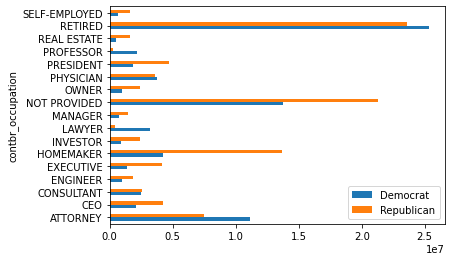

In [139]:
over_2mm.plot(kind='barh')

Note the technique below where he groups a group to get the top contributor occupations.

In [140]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [141]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [142]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

Discretize the contributions into buckets by amount donated. He uses pd.cut and the array to create a category `Series`.

In [144]:
bins = np.array([0, 1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [145]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [146]:
fec_mrbo.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    1.358774e+08
Romney, Mitt     8.833591e+07
Name: contb_receipt_amt, dtype: float64

In [148]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


Let's divide this by what fraction of their money came from each category.

In [149]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<AxesSubplot:ylabel='contb_receipt_amt'>

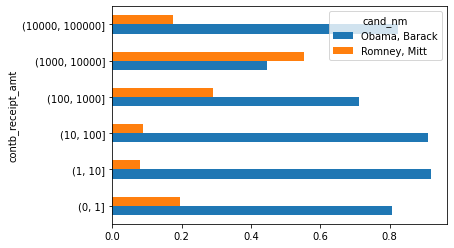

In [151]:
normed_sums[:-2].plot(kind='barh')

## Donation statistics by state

He wants to show which states contributed the most to a candidate's war chess. To do this, he
* groups by candidate and state.
* sums up contributions in the group.
* filters out states where contributions totaled less that $100k.
* normalizes by how much that is of the total.

Each step of these examples makes sense, but it seems to me it would be better to show the shape of the data we want to get and plot out a course to reach it.

In [165]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [166]:
totals = totals[totals.sum(1) > 100_000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
...,...,...
WA,4250933.16,1341521.56
WI,1130155.46,270316.32
WV,169154.47,126725.12


In [167]:
norm_totals = totals.div(totals.sum(axis=0), axis=1)
norm_totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.002079,0.000978
AL,0.004006,0.005980
AR,0.002650,0.001197
AZ,0.011112,0.021416
CA,0.175739,0.127441
...,...,...
WA,0.031356,0.015214
WI,0.008336,0.003066
WV,0.001248,0.001437


<AxesSubplot:xlabel='contbr_st'>

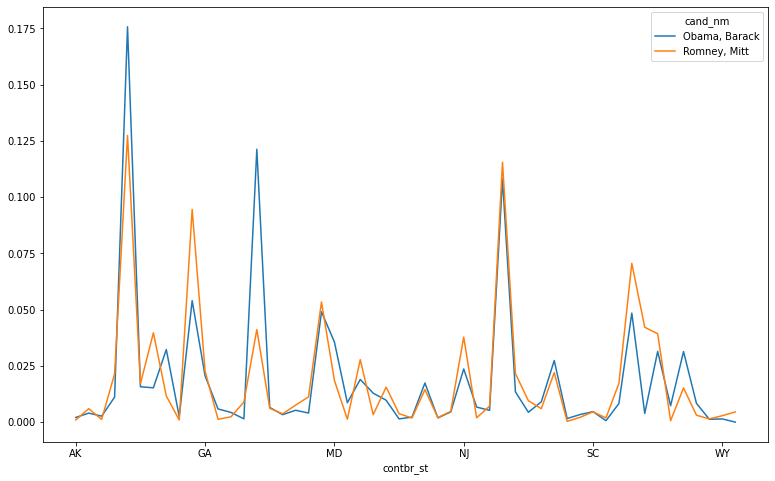

In [169]:
norm_totals.plot(figsize=(13, 8))

In [171]:
norm_totals.columns = ['Obama', 'Romney']
norm_totals[norm_totals['Obama'] > norm_totals['Romney']].index

Index(['AK', 'AR', 'CA', 'DC', 'DE', 'HI', 'IA', 'IL', 'IN', 'MD', 'ME', 'MN',
       'MT', 'NC', 'NM', 'OR', 'PA', 'PR', 'RI', 'SC', 'VT', 'WA', 'WI'],
      dtype='object', name='contbr_st')

In [172]:
norm_totals[norm_totals['Obama'] < norm_totals['Romney']].index

Index(['AL', 'AZ', 'CO', 'CT', 'FL', 'GA', 'ID', 'KS', 'KY', 'LA', 'MA', 'MI',
       'MO', 'MS', 'NE', 'NH', 'NJ', 'NV', 'NY', 'OH', 'OK', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WV', 'WY', 'XX'],
      dtype='object', name='contbr_st')

Good to be able to complete the last example mostly on my own.